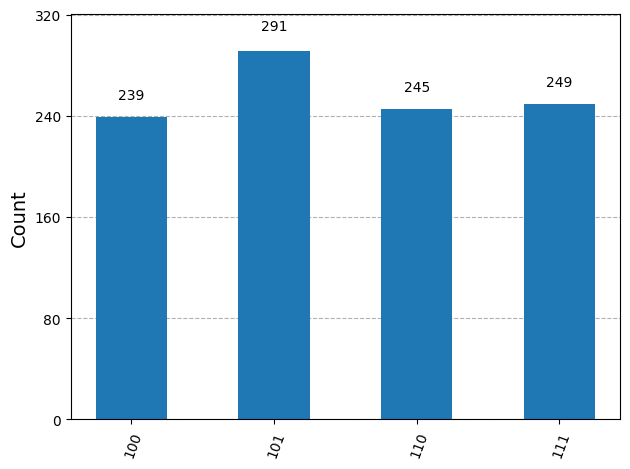

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Step 1: Create an entangled pair between qubit 1 and qubit 2
qc.h(1)  # Apply Hadamard gate to qubit 1
qc.cx(1, 2)  # CNOT gate with qubit 1 as control and qubit 2 as target

# Step 2: Prepare the initial state to teleport in qubit 0
qc.x(0)  # As an example, let's teleport the state |1>. Apply X gate to qubit 0

# Step 3: Perform the teleportation protocol
qc.barrier()  # Just for visual separation
qc.cx(0, 1)  # CNOT gate with qubit 0 as control and qubit 1 as target
qc.h(0)  # Hadamard gate on qubit 0
qc.barrier()  # Visual separation

# Measure qubits 0 and 1
qc.measure(0, 0)  # measure qubit 0 to classical bit 0
qc.measure(1, 1)  # measure qubit 1 to classical bit 1

# Apply a conditional X gate and Z gate depending on the results of the measurements on qubits 0 and 1
qc.cx(1, 2)  # CNOT gate using qubit 1 as control and qubit 2 as target
qc.cz(0, 2)  # CZ gate using qubit 0 as control and qubit 2 as target

# Measure the final state of qubit 2
qc.measure(2, 2)  # measure qubit 2 to classical bit 2

# Simulate the circuit using the Aer Simulator
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)  # Transpile the circuit for the simulator
result = simulator.run(transpiled_qc, shots=1024).result()  # Run the simulation with 1024 shots
counts = result.get_counts()  # Get the counts of each measurement result

# Plot the results in a histogram
plot_histogram(counts)


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

# Quantum teleportation circuit setup
qc = QuantumCircuit(3, 3)

# Create an entangled pair (qubits 1 and 2)
qc.h(1)  # Hadamard gate on qubit 1
qc.cx(1, 2)  # CNOT gate with qubit 1 as control and qubit 2 as target

# Prepare the initial state to teleport in qubit 0
qc.x(0)  # Apply X gate to qubit 0 to simulate teleporting |1>

# Teleportation protocol
qc.barrier()
qc.cx(0, 1)  # CNOT gate with qubit 0 as control and qubit 1 as target
qc.h(0)  # Hadamard on qubit 0
qc.barrier()
qc.measure([0, 1], [0, 1])  # Measure qubits 0 and 1

# Conditional operations based on measurements
qc.cx(1, 2)  # CNOT gate controlled by qubit 1 targeting qubit 2
qc.cz(0, 2)  # CZ gate controlled by qubit 0 and targeting qubit 2
qc.measure(2, 2)  # Measure qubit 2

# Display the circuit
print(qc.draw())
# Alternatively, for a more graphical output if you are using Jupyter notebooks or similar environments:
# display(qc.draw('mpl'))

# Simulate with the Aer Simulator (kept here for completeness, though not needed for the display part)
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()


     ┌───┐      ░      ┌───┐ ░ ┌─┐              
q_0: ┤ X ├──────░───■──┤ H ├─░─┤M├─────────■────
     ├───┤      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐      │    
q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├──■───┼────
     └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘┌─┴─┐ │ ┌─┐
q_2: ─────┤ X ├─░────────────░──╫──╫─┤ X ├─■─┤M├
          └───┘ ░            ░  ║  ║ └───┘   └╥┘
c: 3/═══════════════════════════╩══╩══════════╩═
                                0  1          2 
